# Example 01: Causal discovery using one algorithm only

-------------------------------------------

## Overview


 - AitiaExplorer allows you to see the results of many causal discovery algorithms at once, but it may be easier to understand using just one algorithm at a time.
 - This example will show how you can use AitiaExplorer to do causal discovery with one specific algorithm.

### Imports

In [1]:
import os
import sys
import networkx as nx
from pycausal.pycausal import pycausal
from IPython.display import display, HTML

module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.app import App

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

### Set up for causal discovery

- First create an AitiaExplorer instance and using it to load some simulated data into a pandas dataframe.

In [5]:
aitia = App()

In [6]:
df = aitia.data.simulated_data_1()

In [7]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1,1,0,0,1,2,0,1,2,1
1,2,1,0,0,1,1,1,0,1,2
2,0,2,1,1,1,0,0,2,2,1
3,0,1,0,0,0,1,2,1,1,1
4,0,1,0,1,1,1,2,2,2,1


- This simulated data also has a known causal graph. We will load this as we can use it for testing.
- This causal graph is stored as [DOT graph description language](https://en.wikipedia.org/wiki/DOT_%28graph_description_language%29)

In [8]:
target_str_dot = aitia.data.simulated_data_1_graph()

In [6]:
target_str_dot

'digraph g {\n "X1" -> "X3" [arrowtail=none, arrowhead=normal];\n "X10" -> "X4" [dir=both, arrowtail=normal, arrowhead=none];\n "X2" -> "X7" [arrowtail=none, arrowhead=normal];\n "X2" -> "X9" [arrowtail=none, arrowhead=normal];\n "X10" -> "X7" [dir=both, arrowtail=normal, arrowhead=none];\n "X2" -> "X8" [arrowtail=none, arrowhead=normal];\n "X1" -> "X10" [arrowtail=none, arrowhead=normal];\n "X4" -> "X8" [arrowtail=none, arrowhead=normal];\n "X3" -> "X8" [arrowtail=none, arrowhead=normal];\n "X2" -> "X3" [arrowtail=none, arrowhead=normal];\n}\n'

- Next we will set up a list of algorithms for AitiaExplorer to run. We will just add one, the FCI algorithm.

In [32]:
algorithm_list = []
# be sure to use the uppercase constants only
algorithm_list.append(aitia.algo_runner.GFCI_discrete)

### Run the causal discovery analysis

- Now we will run the causal discovery analysis.
- First we need to start a background Java VM using py-causal as the algorithms are implemented in Java.
- Then we will run the analysis using the `run_causal_discovery` method and AitiaExplorer will return a summary and some useful results.

In [27]:
pc = pycausal()
pc.start_vm()

In [33]:
# pass in the dataframe, the target graph, the algorithm list to run and the py-causal object...
analysis_results, summary = aitia.run_causal_discovery( 
                                       df,
                                       target_graph_str=target_str_dot,
                                       algorithm_list=algorithm_list,
                                       pc=pc)

Running causal discovery using GFCI-discrete


### Display the results

- The results can then be examined using the summary which is just a returned dataframe.
- The AUPRC is a measure of the Area Under the Precision Recall curve, a useful performance metric.
- The Structural Hamming Distance (SHD) measures how close the graph returned by the causal algorithm was to the target graph.
- As we are not using the feature selection functionality, these are listed as 'None'.

In [34]:
display(HTML(summary.to_html()))

,No. of Features Req.,Causal Algorithm,Feature Selection Method,AUPRC,SHD
0,None,GFCI-discrete,None,0.4125,10


- We can view the causal graph that was returned by examining the AnalysisResults object that was returned.

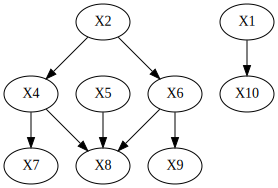

In [35]:
result = analysis_results.results[0]
result.causal_graph.draw()

- We can view the target causal graph by using some of the causal graph utility methods provided by AitiaExplorer.

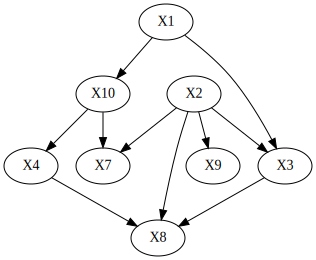

In [14]:
target_graph = aitia.graph_util.get_causal_graph_from_dot(target_str_dot)
target_graph.draw()

As you can see, the causal graph returned by the causal discovery algorithm is not completely correct!

This is one of the challenges of causal analysis.